In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events
ieta=26
df = df.loc[abs(df[b'hcal_ieta']) == ieta]

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

if ieta in range (26,28):
    df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
    df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]

In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

if ieta in range (26,28):
    df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
    df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


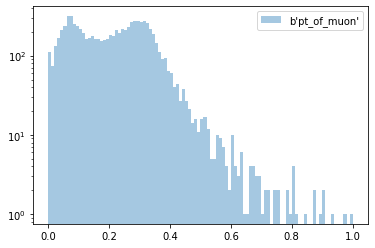

b'eta_of_muon'


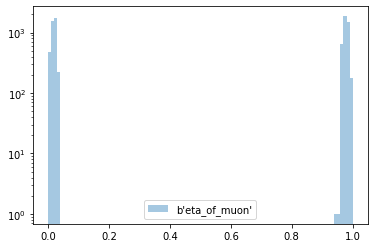

b'phi_of_muon'


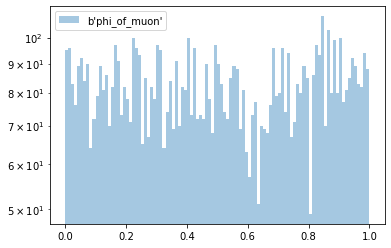

b'energy_of_muon'


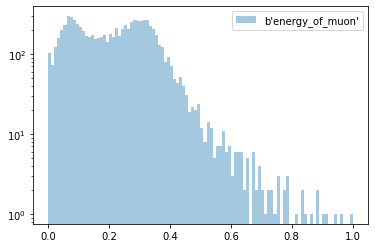

b'hcal_ieta'


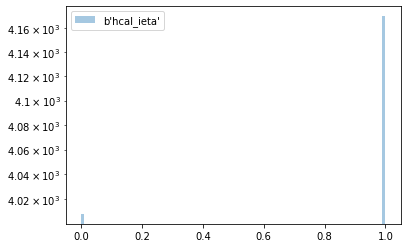

b'hcal_iphi'


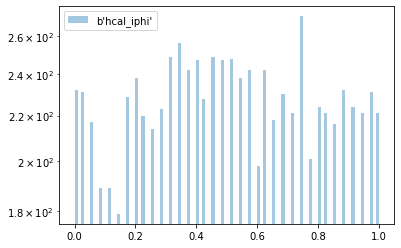

b'IsolationR04'


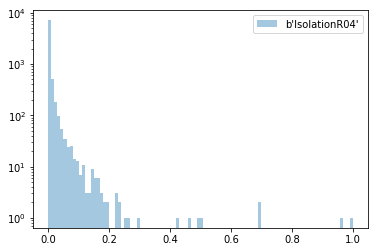

b'IsolationR03'


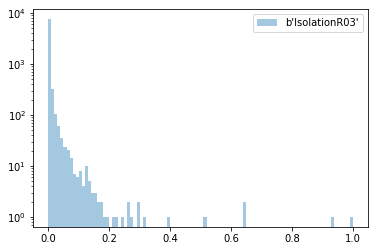

b'ecal_3into3'


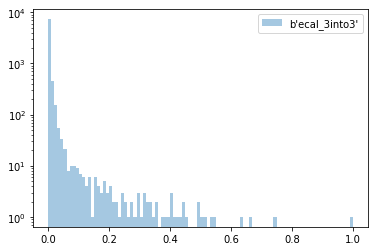

b'hcal_3into3'


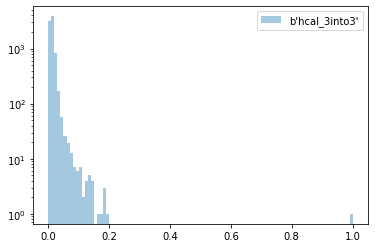

b'ecal_3x3'


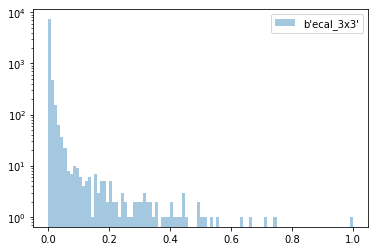

b'hcal_1x1'


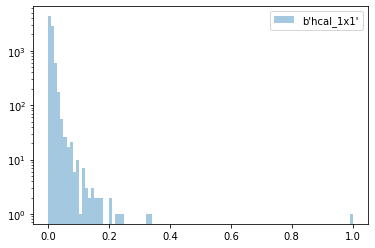

b'hcal_edepth1'_x


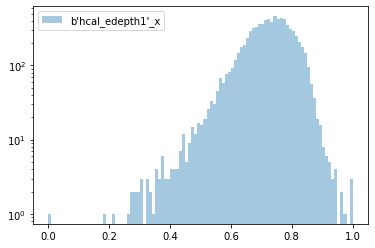

b'hcal_edepth2'_x


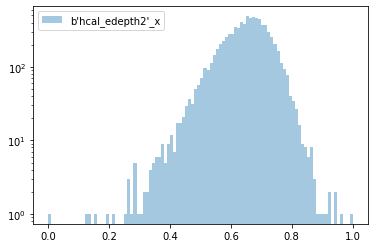

b'hcal_edepth3'_x


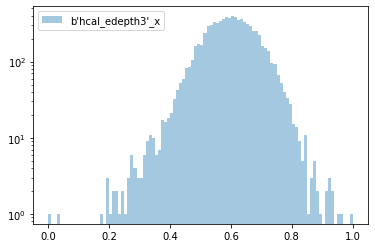

b'hcal_edepth4'_x


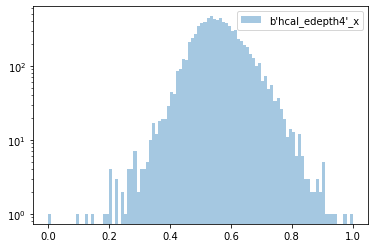

b'hcal_edepth5'_x


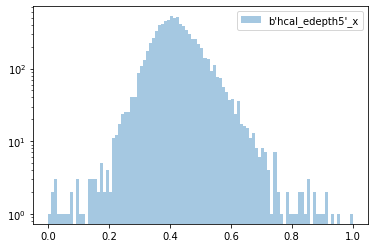

b'hcal_edepth6'_x


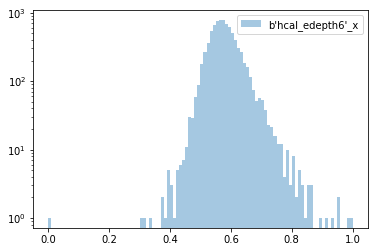

b'hcal_edepth7'_x


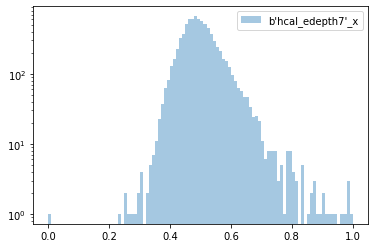

b'hcal_edepth1'_y


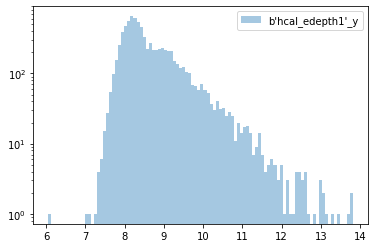

b'hcal_edepth2'_y


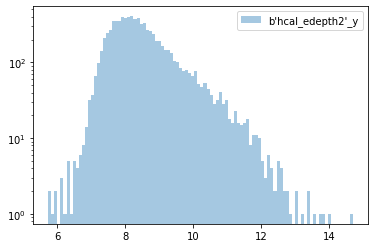

b'hcal_edepth3'_y


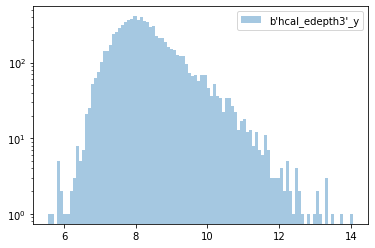

b'hcal_edepth4'_y


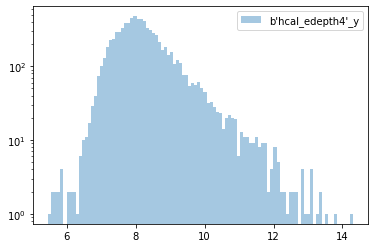

b'hcal_edepth5'_y


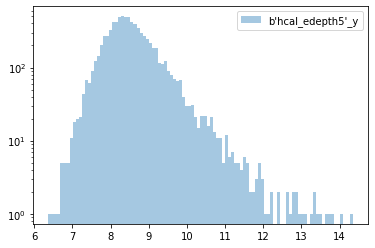

b'hcal_edepth6'_y


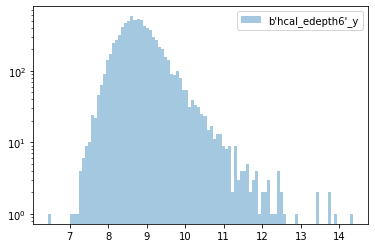

b'hcal_edepth7'_y


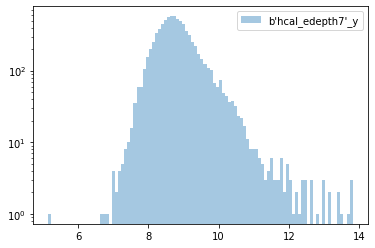

hcal_edepth1_un


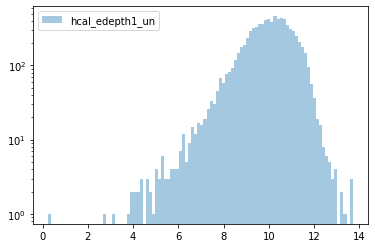

hcal_edepth2_un


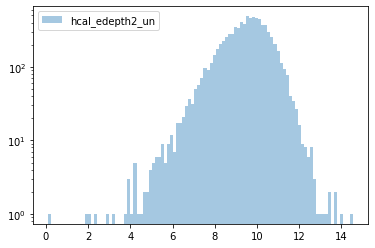

hcal_edepth3_un


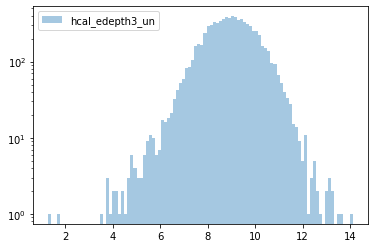

hcal_edepth4_un


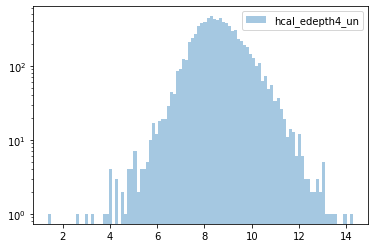

hcal_edepth5_un


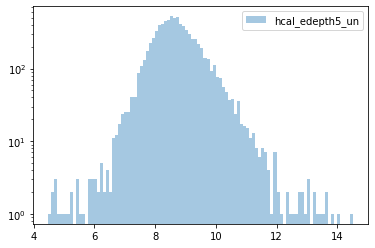

hcal_edepth6_un


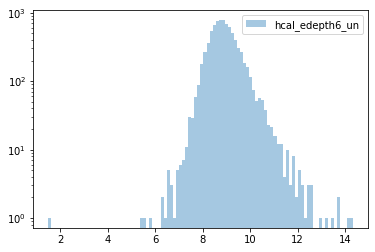

hcal_edepth7_un


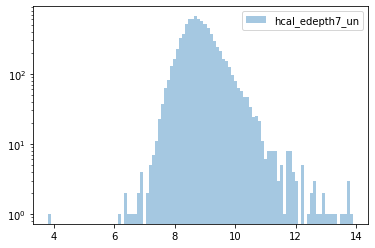

hcal_ieta_un


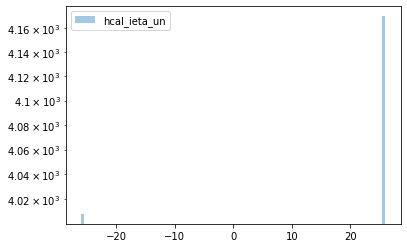

In [7]:
for i in (df.keys()):
    print (i)
    if ieta not in range (26,28):
        if i == "b'hcal_edepth7'_x":
            continue
        if i == "b'hcal_edepth7'_y":
            continue
        if i == "b'hcal_edepth7'_un":
            continue
    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [8]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 2000
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


8178
(2000, 34)
shape of X_train_depth1: (6178, 13)
shape of Y_train_depth2: (6178,)


true_hist_depth1[0] =  [3979 1957  218   24]
sum weight_depth1: 99.99999999999999
true_hist_depth1 [3979 1957  218   24]
weight_vals_depth1: [ 0.53453876  1.08683174  9.7565583  88.62207121]


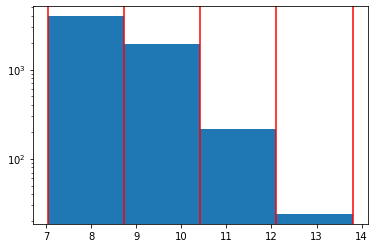

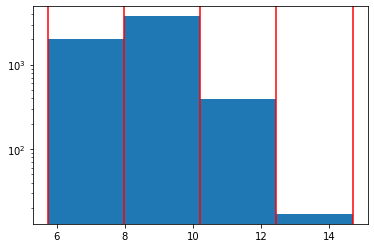

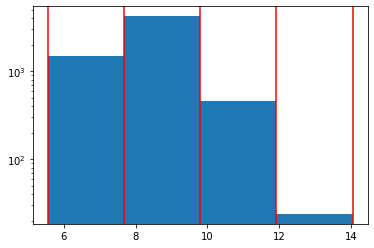

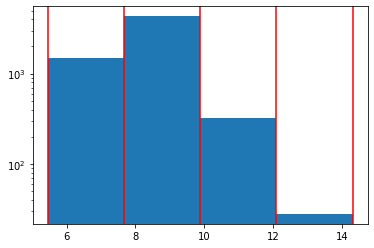

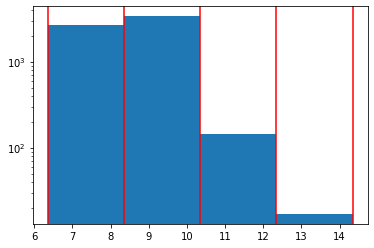

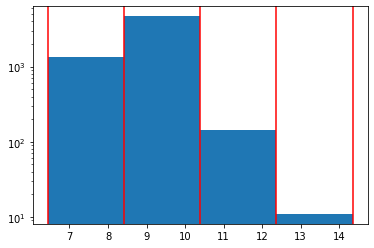

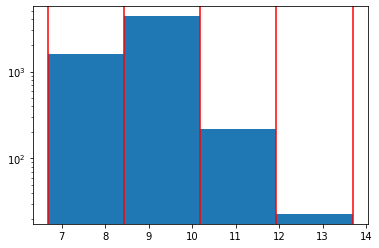

In [9]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))

if ieta in range (26,28):
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6, binweight_depth7]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
               histoAR_depth6, histoAR_depth7]
    
    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1], true_hist_depth7[1]]
    
    for i in range (0,7):
        plt.hist(histoAR[i],bins=nbins)
        
        for j in true_hist[i]:
            plt.axvline(j,color='r')
        
        plt.yscale("log")
        plt.show()
else:
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5, 
               histoAR_depth6]

    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1]]


    for i in range (0,6):
        plt.hist(histoAR[i],bins=nbins)

        for j in true_hist[i]:
            plt.axvline(j,color='r')
        plt.yscale("log")
        plt.show()

In [10]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [11]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))
if ieta in range (26,28):
    input7=Input(shape=(X_train_depth7.shape[1],))

x1 = Dense(40, activation="relu")(input1)
x1 = Dense(600, activation="relu")(x1)
x1 = Dense(600, activation="relu")(x1)
x1 = Dense(20, activation="relu")(x1)
x1 = Dense(1, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)

x2 = Dense(40, activation="relu")(input2)
x2 = Dense(600, activation="relu")(x2)
x2 = Dense(600, activation="relu")(x2)
x2 = Dense(20, activation="relu")(x2)
x2 = Dense(1, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)

x3 = Dense(40, activation="relu")(input3)
x3 = Dense(600, activation="relu")(x3)
x3 = Dense(600, activation="relu")(x3)
x3 = Dense(20, activation="relu")(x3)
x3 = Dense(1, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)

x4 = Dense(40, activation="relu")(input4)
x4 = Dense(600, activation="relu")(x4)
x4 = Dense(600, activation="relu")(x4)
x4 = Dense(20, activation="relu")(x4)
x4 = Dense(1, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)

x5 = Dense(40, activation="relu")(input5)
x5 = Dense(600, activation="relu")(x5)
x5 = Dense(600, activation="relu")(x5)
x5 = Dense(20, activation="relu")(x5)
x5 = Dense(1, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)

x6 = Dense(40, activation="relu")(input6)
x6 = Dense(600, activation="relu")(x6)
x6 = Dense(600, activation="relu")(x6)
x6 = Dense(20, activation="relu")(x6)
x6 = Dense(1, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)

if ieta in range (26,28):
    x7 = Dense(40, activation="relu")(input7)
    x7 = Dense(600, activation="relu")(x7)
    x7 = Dense(600, activation="relu")(x7)
    x7 = Dense(20, activation="relu")(x7)
    x7 = Dense(1, activation="relu")(x7)
    x7 = Model(inputs=input7, outputs=x7)


if ieta in range (26,28):
    n=7
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                              x5.output, x6.output, x7.output])
else:
    n=6
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, x5.output, x6.output])

z1 = Dense(40, activation="relu")(combined)
z1 = Dense(600, activation="relu")(z1)
z1 = Dense(600, activation="relu")(z1)
z1 = Dense(20, activation="relu")(z1)
z1 = Dense(n)(z1)


if ieta in range (26,28):
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input, x7.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6, X_train_depth7], [Y_train_depth1, Y_train_depth2, Y_train_depth3, 
                         Y_train_depth4, Y_train_depth5, Y_train_depth6, Y_train_depth7], batch_size=4000, 
                         epochs=1500, validation_split=0.2, verbose=1,sample_weight=binweight)
else:
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6],[Y_train_depth1, Y_train_depth2, Y_train_depth3, Y_train_depth4,
                         Y_train_depth5, Y_train_depth6] , batch_size=4000, epochs=1500, validation_split=0.2, 
                         verbose=1,sample_weight=binweight)

creating model=========>
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 13)]         0                                            
___________________________________________________________________

2/2 [==============================] - 2s 486ms/step - loss: 142.6671 - val_loss: 176.7183
Epoch 2/1500
2/2 [==============================] - 0s 79ms/step - loss: 139.3260 - val_loss: 165.9971
Epoch 3/1500
2/2 [==============================] - 0s 82ms/step - loss: 129.9327 - val_loss: 142.7924
Epoch 4/1500
2/2 [==============================] - 0s 80ms/step - loss: 110.8190 - val_loss: 102.0214
Epoch 5/1500
2/2 [==============================] - 0s 79ms/step - loss: 77.7474 - val_loss: 63.9125
Epoch 6/1500
2/2 [==============================] - 0s 84ms/step - loss: 52.6137 - val_loss: 73.4829
Epoch 7/1500
2/2 [==============================] - 0s 81ms/step - loss: 55.6144 - val_loss: 44.7543
Epoch 8/1500
2/2 [==============================] - 0s 81ms/step - loss: 34.0322 - val_loss: 31.1301
Epoch 9/1500
2/2 [==============================] - 0s 79ms/step - loss: 25.1672 - val_loss: 28.6036
Epoch 10/1500
2/2 [==============================] - 0s 83ms/step - loss: 23.2932 - val_loss: 2

2/2 [==============================] - 0s 80ms/step - loss: 1.1977 - val_loss: 8.6336
Epoch 83/1500
2/2 [==============================] - 0s 79ms/step - loss: 1.2148 - val_loss: 8.1775
Epoch 84/1500
2/2 [==============================] - 0s 83ms/step - loss: 1.2232 - val_loss: 8.2260
Epoch 85/1500
2/2 [==============================] - 0s 79ms/step - loss: 1.2108 - val_loss: 8.8263
Epoch 86/1500
2/2 [==============================] - 0s 80ms/step - loss: 1.2052 - val_loss: 8.3510
Epoch 87/1500
2/2 [==============================] - 0s 85ms/step - loss: 1.1951 - val_loss: 8.4173
Epoch 88/1500
2/2 [==============================] - 0s 78ms/step - loss: 1.1864 - val_loss: 8.6953
Epoch 89/1500
2/2 [==============================] - 0s 81ms/step - loss: 1.1798 - val_loss: 8.5016
Epoch 90/1500
2/2 [==============================] - 0s 80ms/step - loss: 1.1742 - val_loss: 8.2333
Epoch 91/1500
2/2 [==============================] - 0s 82ms/step - loss: 1.1919 - val_loss: 8.4445
Epoch 92/1500


2/2 [==============================] - 0s 85ms/step - loss: 1.0638 - val_loss: 7.9030
Epoch 164/1500
2/2 [==============================] - 0s 80ms/step - loss: 1.0471 - val_loss: 8.4992
Epoch 165/1500
2/2 [==============================] - 0s 81ms/step - loss: 1.1008 - val_loss: 7.5421
Epoch 166/1500
2/2 [==============================] - 0s 83ms/step - loss: 1.0766 - val_loss: 7.4057
Epoch 167/1500
2/2 [==============================] - 0s 85ms/step - loss: 1.0792 - val_loss: 8.0425
Epoch 168/1500
2/2 [==============================] - 0s 81ms/step - loss: 1.0767 - val_loss: 7.5168
Epoch 169/1500
2/2 [==============================] - 0s 79ms/step - loss: 1.0511 - val_loss: 7.4076
Epoch 170/1500
2/2 [==============================] - 0s 84ms/step - loss: 1.0655 - val_loss: 7.8744
Epoch 171/1500
2/2 [==============================] - 0s 83ms/step - loss: 1.0551 - val_loss: 7.5521
Epoch 172/1500
2/2 [==============================] - 0s 81ms/step - loss: 1.0457 - val_loss: 7.5020
Epoch

2/2 [==============================] - 0s 84ms/step - loss: 1.0021 - val_loss: 5.0537
Epoch 245/1500
2/2 [==============================] - 0s 80ms/step - loss: 1.0185 - val_loss: 5.2171
Epoch 246/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9999 - val_loss: 5.3368
Epoch 247/1500
2/2 [==============================] - 0s 88ms/step - loss: 1.0100 - val_loss: 5.1270
Epoch 248/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9949 - val_loss: 5.2935
Epoch 249/1500
2/2 [==============================] - 0s 85ms/step - loss: 1.0000 - val_loss: 5.0751
Epoch 250/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9998 - val_loss: 5.2102
Epoch 251/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9931 - val_loss: 5.1130
Epoch 252/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.9876 - val_loss: 4.9653
Epoch 253/1500
2/2 [==============================] - 0s 88ms/step - loss: 1.0005 - val_loss: 5.1782
Epoch

2/2 [==============================] - 0s 86ms/step - loss: 0.9684 - val_loss: 3.3908
Epoch 326/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9655 - val_loss: 3.2994
Epoch 327/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9730 - val_loss: 3.3684
Epoch 328/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.9560 - val_loss: 3.3189
Epoch 329/1500
2/2 [==============================] - 0s 87ms/step - loss: 0.9593 - val_loss: 3.3492
Epoch 330/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9540 - val_loss: 3.3463
Epoch 331/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9553 - val_loss: 3.2610
Epoch 332/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9720 - val_loss: 3.4017
Epoch 333/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9850 - val_loss: 3.2216
Epoch 334/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.9795 - val_loss: 3.2976
Epoch

2/2 [==============================] - 0s 84ms/step - loss: 0.9356 - val_loss: 2.4845
Epoch 407/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9389 - val_loss: 2.4913
Epoch 408/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9287 - val_loss: 2.5332
Epoch 409/1500
2/2 [==============================] - 0s 91ms/step - loss: 0.9382 - val_loss: 2.6355
Epoch 410/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.9815 - val_loss: 2.5755
Epoch 411/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9452 - val_loss: 2.5550
Epoch 412/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9332 - val_loss: 2.5155
Epoch 413/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9245 - val_loss: 2.4925
Epoch 414/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9284 - val_loss: 2.4679
Epoch 415/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9276 - val_loss: 2.4690
Epoch

2/2 [==============================] - 0s 81ms/step - loss: 0.9270 - val_loss: 2.1987
Epoch 488/1500
2/2 [==============================] - 0s 89ms/step - loss: 0.9285 - val_loss: 2.1117
Epoch 489/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.9103 - val_loss: 2.1259
Epoch 490/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9099 - val_loss: 2.1772
Epoch 491/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9257 - val_loss: 2.0874
Epoch 492/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9145 - val_loss: 2.1261
Epoch 493/1500
2/2 [==============================] - 0s 87ms/step - loss: 0.9072 - val_loss: 2.0769
Epoch 494/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9155 - val_loss: 2.1456
Epoch 495/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9179 - val_loss: 2.1014
Epoch 496/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9034 - val_loss: 2.1027
Epoch

2/2 [==============================] - 0s 80ms/step - loss: 0.9045 - val_loss: 2.1680
Epoch 569/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9520 - val_loss: 2.0567
Epoch 570/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.9658 - val_loss: 2.4065
Epoch 571/1500
2/2 [==============================] - 0s 83ms/step - loss: 1.0111 - val_loss: 2.1948
Epoch 572/1500
2/2 [==============================] - 0s 84ms/step - loss: 1.0472 - val_loss: 2.1462
Epoch 573/1500
2/2 [==============================] - 0s 86ms/step - loss: 0.9014 - val_loss: 2.0389
Epoch 574/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8989 - val_loss: 2.0933
Epoch 575/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9096 - val_loss: 1.9648
Epoch 576/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9058 - val_loss: 2.0620
Epoch 577/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.9073 - val_loss: 1.9461
Epoch

2/2 [==============================] - 0s 79ms/step - loss: 0.8888 - val_loss: 1.7272
Epoch 650/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8865 - val_loss: 1.9976
Epoch 651/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9193 - val_loss: 1.7410
Epoch 652/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.9080 - val_loss: 2.1677
Epoch 653/1500
2/2 [==============================] - 0s 78ms/step - loss: 0.9826 - val_loss: 1.7807
Epoch 654/1500
2/2 [==============================] - 0s 81ms/step - loss: 1.0076 - val_loss: 2.0867
Epoch 655/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.9492 - val_loss: 1.7077
Epoch 656/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.9420 - val_loss: 1.8258
Epoch 657/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8917 - val_loss: 1.6489
Epoch 658/1500
2/2 [==============================] - 0s 76ms/step - loss: 0.9036 - val_loss: 1.9010
Epoch

2/2 [==============================] - 0s 88ms/step - loss: 0.8500 - val_loss: 1.6253
Epoch 731/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8622 - val_loss: 1.6656
Epoch 732/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8529 - val_loss: 1.6336
Epoch 733/1500
2/2 [==============================] - 0s 86ms/step - loss: 0.8564 - val_loss: 1.6818
Epoch 734/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8538 - val_loss: 1.6469
Epoch 735/1500
2/2 [==============================] - 0s 87ms/step - loss: 0.8481 - val_loss: 1.7898
Epoch 736/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.8558 - val_loss: 1.6119
Epoch 737/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8554 - val_loss: 1.7676
Epoch 738/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8537 - val_loss: 1.7497
Epoch 739/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.8563 - val_loss: 1.5615
Epoch

2/2 [==============================] - 0s 81ms/step - loss: 0.8323 - val_loss: 1.6930
Epoch 812/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8321 - val_loss: 1.8136
Epoch 813/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8401 - val_loss: 1.5821
Epoch 814/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8465 - val_loss: 1.9492
Epoch 815/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.8658 - val_loss: 1.5138
Epoch 816/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.8766 - val_loss: 2.2709
Epoch 817/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.9563 - val_loss: 1.5071
Epoch 818/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.8954 - val_loss: 2.1284
Epoch 819/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9112 - val_loss: 1.5456
Epoch 820/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8743 - val_loss: 2.1325
Epoch

2/2 [==============================] - 0s 82ms/step - loss: 0.8396 - val_loss: 1.5262
Epoch 893/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8544 - val_loss: 1.9292
Epoch 894/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.8455 - val_loss: 1.7338
Epoch 895/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.8173 - val_loss: 1.7659
Epoch 896/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8167 - val_loss: 1.6757
Epoch 897/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8213 - val_loss: 1.7669
Epoch 898/1500
2/2 [==============================] - 0s 86ms/step - loss: 0.8202 - val_loss: 1.9558
Epoch 899/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8392 - val_loss: 1.5435
Epoch 900/1500
2/2 [==============================] - 0s 87ms/step - loss: 0.8532 - val_loss: 2.0033
Epoch 901/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8550 - val_loss: 1.5901
Epoch

2/2 [==============================] - 0s 84ms/step - loss: 0.8279 - val_loss: 1.5346
Epoch 974/1500
2/2 [==============================] - 0s 86ms/step - loss: 0.8768 - val_loss: 2.0391
Epoch 975/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8334 - val_loss: 1.6129
Epoch 976/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.8325 - val_loss: 1.9609
Epoch 977/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.8089 - val_loss: 1.6393
Epoch 978/1500
2/2 [==============================] - 0s 90ms/step - loss: 0.8196 - val_loss: 1.7581
Epoch 979/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8219 - val_loss: 1.9664
Epoch 980/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.8268 - val_loss: 1.6749
Epoch 981/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8166 - val_loss: 1.8623
Epoch 982/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8106 - val_loss: 1.7067
Epoch

2/2 [==============================] - 0s 85ms/step - loss: 0.7891 - val_loss: 1.7848
Epoch 1054/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.7856 - val_loss: 1.8117
Epoch 1055/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.7902 - val_loss: 2.2256
Epoch 1056/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8309 - val_loss: 1.5769
Epoch 1057/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8344 - val_loss: 2.0918
Epoch 1058/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8102 - val_loss: 1.6761
Epoch 1059/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.7953 - val_loss: 2.2373
Epoch 1060/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.8268 - val_loss: 1.5399
Epoch 1061/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8905 - val_loss: 1.5012
Epoch 1062/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9002 - val_loss: 2.5

2/2 [==============================] - 0s 77ms/step - loss: 0.7787 - val_loss: 1.8204
Epoch 1134/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.7866 - val_loss: 2.3007
Epoch 1135/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.8187 - val_loss: 1.6585
Epoch 1136/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.7930 - val_loss: 2.1940
Epoch 1137/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.8004 - val_loss: 1.8901
Epoch 1138/1500
2/2 [==============================] - 0s 82ms/step - loss: 0.7627 - val_loss: 1.8890
Epoch 1139/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.7648 - val_loss: 1.9178
Epoch 1140/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.7638 - val_loss: 2.1596
Epoch 1141/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.7845 - val_loss: 1.7046
Epoch 1142/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8077 - val_loss: 1.9

2/2 [==============================] - 0s 80ms/step - loss: 0.7766 - val_loss: 2.0445
Epoch 1214/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.7852 - val_loss: 1.6046
Epoch 1215/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.8474 - val_loss: 2.7267
Epoch 1216/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.9165 - val_loss: 1.5237
Epoch 1217/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9068 - val_loss: 2.7267
Epoch 1218/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.9035 - val_loss: 1.5151
Epoch 1219/1500
2/2 [==============================] - 0s 79ms/step - loss: 1.0755 - val_loss: 3.3681
Epoch 1220/1500
2/2 [==============================] - 0s 77ms/step - loss: 1.1266 - val_loss: 1.5837
Epoch 1221/1500
2/2 [==============================] - 0s 88ms/step - loss: 1.1384 - val_loss: 3.0757
Epoch 1222/1500
2/2 [==============================] - 0s 80ms/step - loss: 1.0365 - val_loss: 1.5

2/2 [==============================] - 0s 83ms/step - loss: 0.7236 - val_loss: 1.8546
Epoch 1294/1500
2/2 [==============================] - 0s 78ms/step - loss: 0.7486 - val_loss: 2.1740
Epoch 1295/1500
2/2 [==============================] - 0s 78ms/step - loss: 0.7290 - val_loss: 1.9855
Epoch 1296/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.7337 - val_loss: 2.0443
Epoch 1297/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.7234 - val_loss: 2.0236
Epoch 1298/1500
2/2 [==============================] - 0s 78ms/step - loss: 0.7281 - val_loss: 2.1131
Epoch 1299/1500
2/2 [==============================] - 0s 84ms/step - loss: 0.7223 - val_loss: 1.8212
Epoch 1300/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.7510 - val_loss: 2.3613
Epoch 1301/1500
2/2 [==============================] - 0s 83ms/step - loss: 0.7504 - val_loss: 2.0026
Epoch 1302/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.7313 - val_loss: 1.8

2/2 [==============================] - 0s 82ms/step - loss: 0.8089 - val_loss: 2.4999
Epoch 1374/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.7587 - val_loss: 1.7881
Epoch 1375/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.7842 - val_loss: 2.8424
Epoch 1376/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.8536 - val_loss: 1.7415
Epoch 1377/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.8123 - val_loss: 2.3614
Epoch 1378/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.7587 - val_loss: 2.3781
Epoch 1379/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.7571 - val_loss: 2.0113
Epoch 1380/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.7348 - val_loss: 2.2336
Epoch 1381/1500
2/2 [==============================] - 0s 85ms/step - loss: 0.7391 - val_loss: 1.7222
Epoch 1382/1500
2/2 [==============================] - 0s 86ms/step - loss: 0.8039 - val_loss: 3.2

2/2 [==============================] - 0s 82ms/step - loss: 0.6912 - val_loss: 2.2438
Epoch 1454/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.6909 - val_loss: 2.1429
Epoch 1455/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.6897 - val_loss: 2.1161
Epoch 1456/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.6909 - val_loss: 2.3012
Epoch 1457/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.6942 - val_loss: 2.2114
Epoch 1458/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.6882 - val_loss: 2.1816
Epoch 1459/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.6892 - val_loss: 2.2567
Epoch 1460/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.6900 - val_loss: 2.2573
Epoch 1461/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.6881 - val_loss: 2.2693
Epoch 1462/1500
2/2 [==============================] - 0s 81ms/step - loss: 0.6866 - val_loss: 1.8

dict_keys(['loss', 'val_loss'])


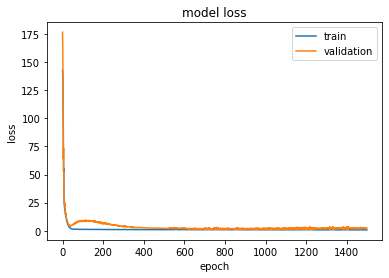

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
# evaluate model
if ieta in range (26,28):
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]], 
                           X_test[:,np.r_[0:12,18]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24], 
               X_test[:,25]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], 
                   X_test[:,31], X_test[:,32]]

else:
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30]]
    
preds = preds.reshape(preds.shape[1],preds.shape[0])

if ieta in range (26,28):
    n=7
else:
    n=6

for i in range (0,n):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


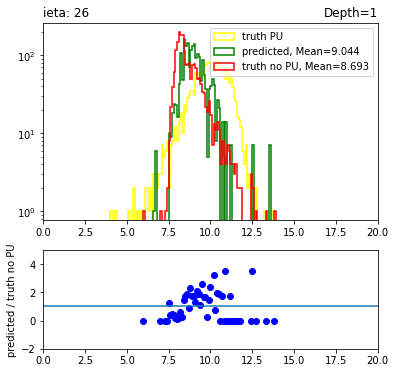

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


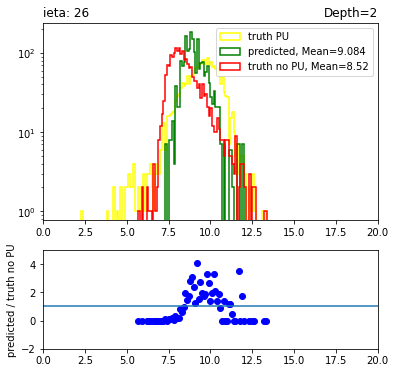

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


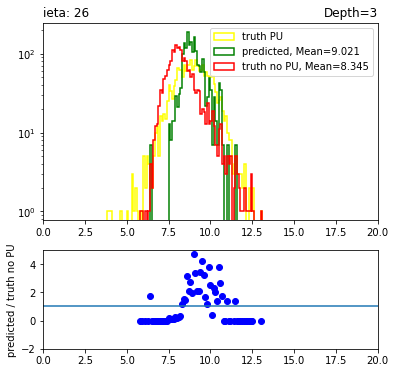

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


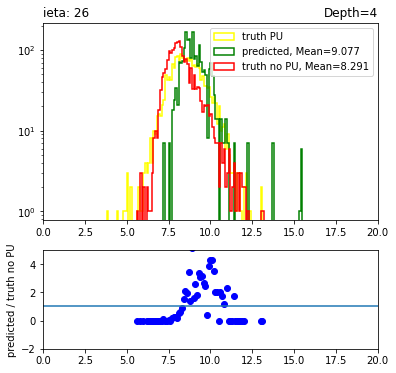

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


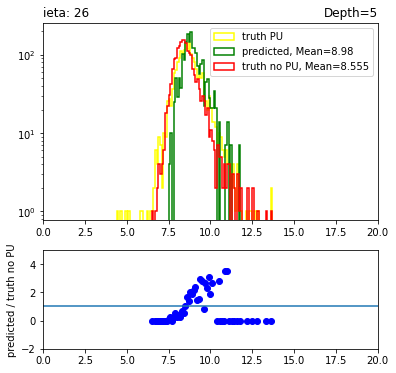

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


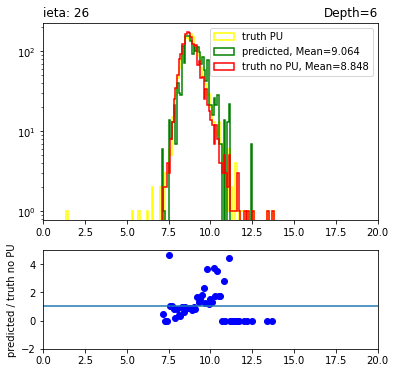

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


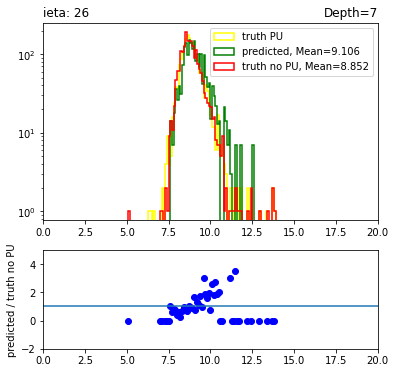

In [14]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [15]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

1.4449297
1.2142746
1.0870891
3.2567968
1.0356772
1.1992859


/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


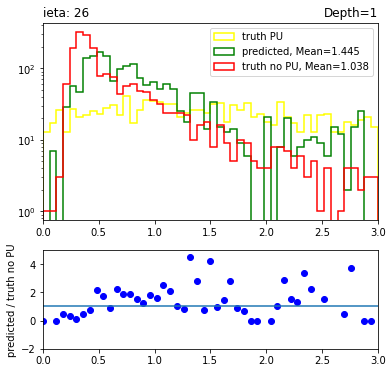

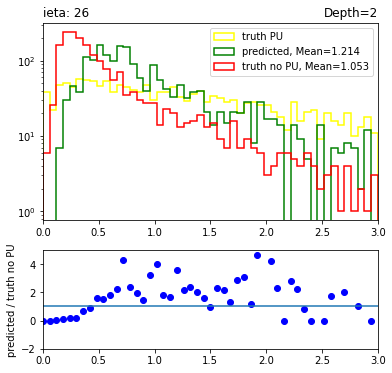

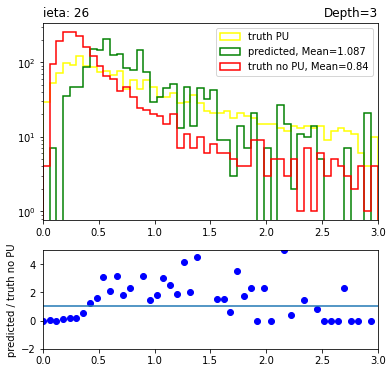

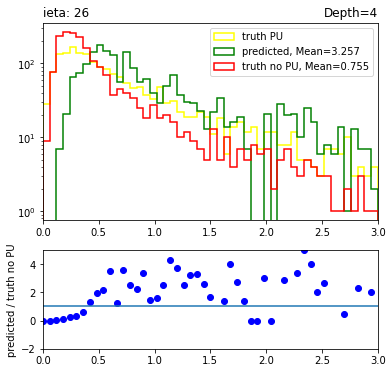

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


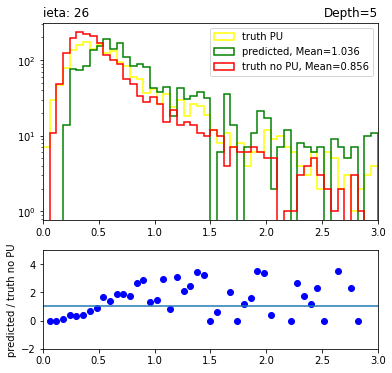

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


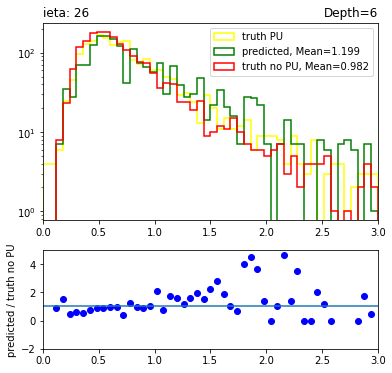

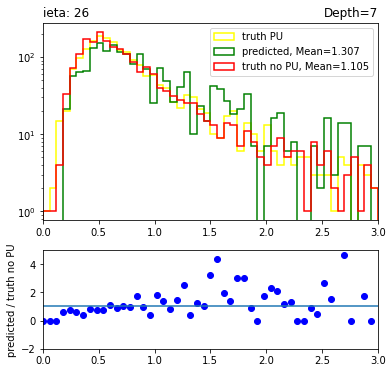

In [16]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=50,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog_new/ieta'+str(ieta)+'_'+str(k)+'_nonLog.png')
    plt.savefig('nonLog_new/ieta'+str(ieta)+'_'+str(k)+'_nonLog.pdf')
    plt.show()
    



In [19]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_ieta'+str(ieta)+'.h5')

In [20]:
import h5py
hf=h5py.File('model/model_ieta'+str(ieta)+'.h5','r')
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>